# Calories Burnt Prediction

## Data Preparation 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_exercise = pd.read_csv("exercise.csv")
df_calories = pd.read_csv("calories.csv")

In [3]:
df_exercise.head(2)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3

In [4]:
df_calories.head(1)

User_ID  Calories
0  14733363     231.0

In [5]:
df = pd.concat([df_exercise,df_calories['Calories']], axis=1)

In [6]:
df.head(5)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [7]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df.shape

(15000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [11]:
# dropping unwanted column

df = df.drop(columns=['User_ID'])

## Data Visualization

C:\Users\Shiva\AppData\Local\Temp\ipykernel_15324\1258473641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'], kde=True, color='blue', bins=30, label='Height')
C:\Users\Shiva\AppData\Local\Temp\ipykernel_15324\1258473641.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Wei

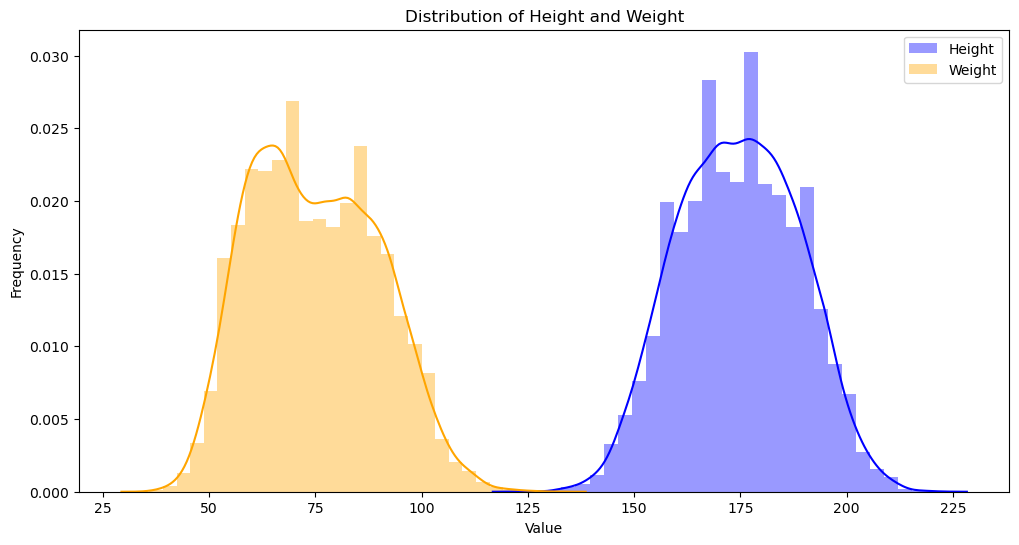

In [12]:
#Distribution of Height and Weight

plt.figure(figsize=(12, 6))
sns.distplot(df['Height'], kde=True, color='blue', bins=30, label='Height')
sns.distplot(df['Weight'], kde=True, color='orange', bins=30, label='Weight')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Height and Weight')
plt.legend()
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_15324\144874622.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


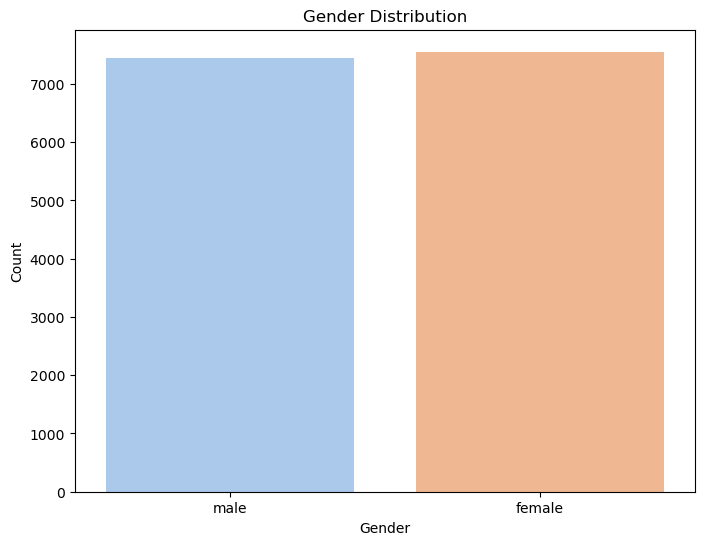

In [13]:
#Gender distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

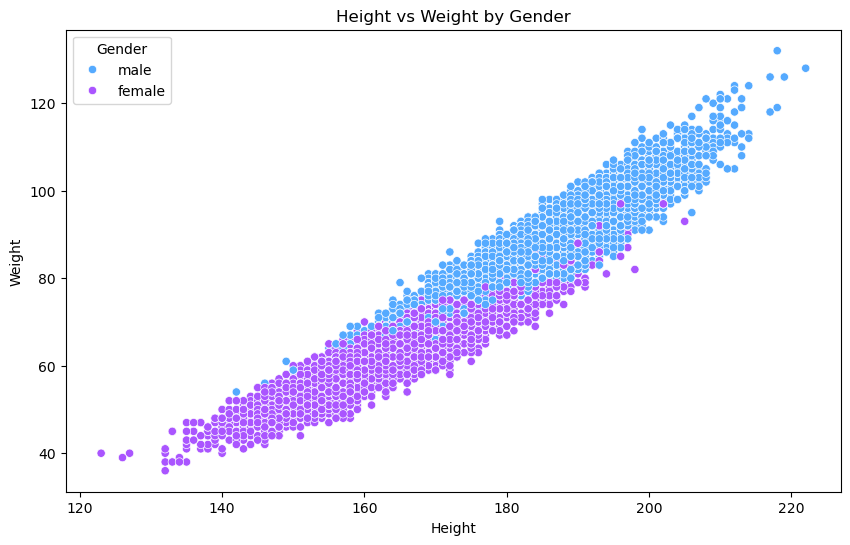

In [14]:
#Scatter plot for Height vs Weight

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, palette='cool')
plt.title('Height vs Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

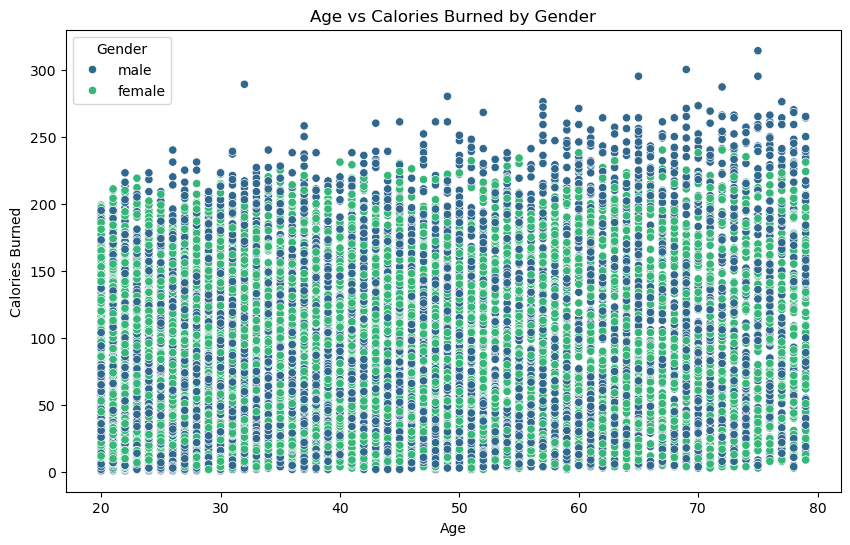

In [15]:
#Age vs Calories burned

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Calories', hue='Gender', data=df, palette='viridis')
plt.title('Age vs Calories Burned by Gender')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_15324\3302801047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Heart_Rate', data=df, palette='muted')


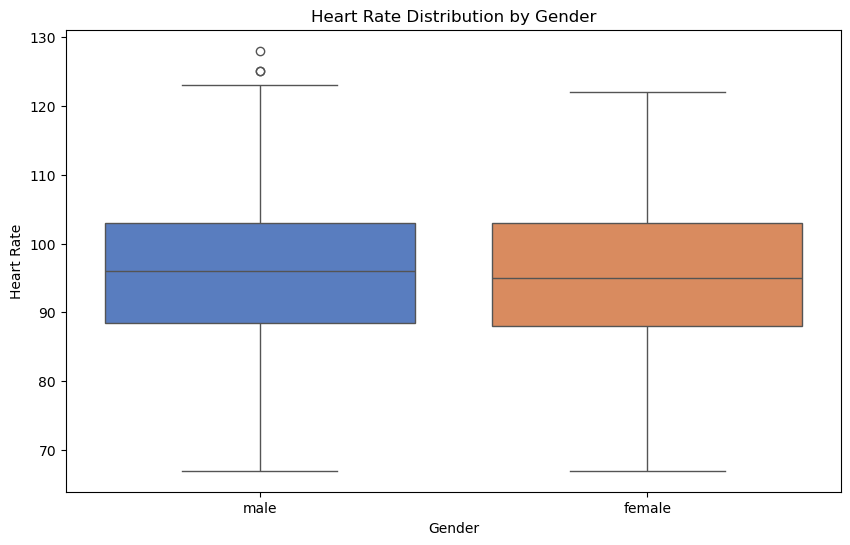

In [16]:
#Boxplot of Heart Rate by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Heart_Rate', data=df, palette='muted')
plt.title('Heart Rate Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()

In [17]:
from pandas_profiling import ProfileReport
ProfileReport(df)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_15324\2181367630.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Converting categorical data into numerical data 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [19]:
df.sample(5)

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
11025       0   41   171.0    69.0      21.0       105.0       40.1     129.0
2851        1   69   194.0   104.0      17.0       101.0       40.2     130.0
8189        1   40   209.0   116.0       4.0        86.0       39.1      17.0
864         1   65   198.0    96.0       5.0        85.0       39.1      24.0
12764       0   56   171.0    70.0       2.0        79.0       38.1       7.0

In [20]:
df.corr()

Gender       Age    Height    Weight  Duration  Heart_Rate  \
Gender      1.000000  0.003222  0.710534  0.783186  0.003440    0.011555   
Age         0.003222  1.000000  0.009554  0.090094  0.013247    0.010482   
Height      0.710534  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight      0.783186  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration    0.003440  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate  0.011555  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.007264  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories    0.022357  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
Gender       0.007264  0.022357  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000

<Axes: >

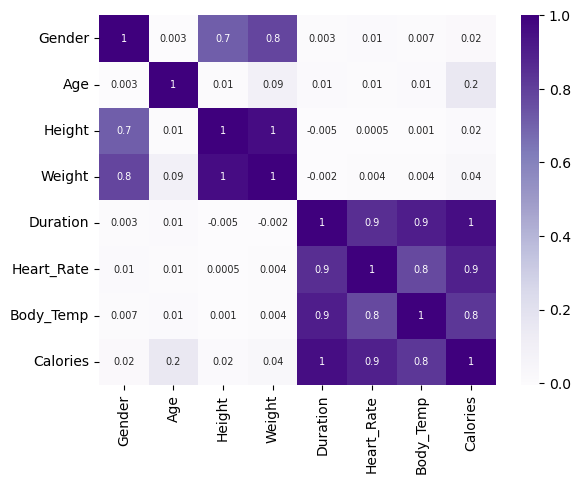

In [21]:
sns.heatmap(df.corr(), annot= True ,annot_kws = {'size':7}, fmt ='.1g', cmap ='Purples')

## Train test and split

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Calories'], axis=1)
y = df['Calories']

In [25]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [26]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Model Training & Evaluation

In [33]:
from xgboost import XGBRegressor
from sklearn import metrics

model = XGBRegressor()

In [34]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [38]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


In [39]:
squared_error = metrics.r2_score(y_test,y_pred)
print("R2 score is: ",squared_error)

R2 score is:  0.998800624504713
